# Разработка стратегии взаимодействия с клиентами и их удержания для сети фитнес-центров

В этом проекте проведем аналитическую работу над данными по множеству клиентских анкет сити фитнес-центров "Культурист-датасентист". На основании имеющихся данных составим план действий по удержанию клиентов.

**Цель исследования:**

Провести анализ и подготовить план действий по удержанию клиентов.

**Задачи исследования:**

- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- проанализировать основные признаки, наиболее сильно влияющие на отток;
- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    - *1) выделить целевые группы клиентов;*

    - *2) предложить меры по снижению оттока;*

    - *3) определить другие особенности взаимодействия с клиентами.*

**Исходные данные:**

 "gym_churn.csv" - название файла.
 
Данные клиента за предыдущий до проверки факта оттока месяц:
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- 'Promo_friends' — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- 'Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон.
- 'Churn' — факт оттока в текущем месяце.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться в концепции / деталях работы. 

</div>

## Исследовательский анализ данных EDA

### Ознакомимся с имеющимися данными, выясним: есть ли в них отсутствующие признаки, изучим средние значения и стандартные отклонения 

In [5]:
import pandas as pd
import pathlib

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# из модуля для иерархической кластеризации hierarchy импортируем классы модели кластеризации:
from scipy.cluster.hierarchy import dendrogram, linkage

# импортируем модель KMeans для кластеризации
from sklearn.cluster import KMeans

# импортируем необходимые метрики для оценки моделей бинарной классификации
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [6]:
#прочитаем из csv-файла полученные данные
path = pathlib.Path('https://github.com/shklyr-yana/gym/blob/main/gym_churn.csv'
print(path)  
df = pd.read_csv(path)
#распечатаем его размер и первые 5 строк
display(df.shape)
display(df.head())

df.info() #посмотрим на сводную информацию о наборе данных

display(df.describe()) # для наглядного изучения среднего значения, стандартного отклонения и т.д.


https://github.com/shklyr-yana/gym/blob/main/gym_churn.csv

(4000, 14)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Имеем качественный набор данных без отсутствующих признаков, который состоит из 4000 записей и 14 полей. Тип данных во всём датасете - числовые значения.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Кстати для удобства изучения таблицы мы можем транспонировать расчеты `data.describe().T`    
</div>

### Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался 

In [7]:
df.groupby('Churn').mean().reset_index()

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Имеем такие средние значения признаков, которые значительно отличаются у клиентов которые ушли в отток от тех кто остался :
- Partner. Клиенты, которые являются сотрудниками компании-партнёра клуба, реже попадают в отток нежели те клиенты, кто приобретает абонемет самостоятельно;
- Promo_friends. Схожая ситуация с предыдущим признаком - в оттоке меньше тех, кто пришёл по приглашению от друга;
- Contract_period. В отток попадают клиенты у которых приобретён абонемент на менее длительный срок - очевидно, часто начинающие культуристы-датасентисты перестраховываются и берут недорогой абонемент на 1 - 2 месяца;
- Group_visits. С групповых занятий отток практически вдвое меньше, заниматься спортом совместно - это более увлекательно;
- Month_to_end_contract. У клиентов "в оттоке" , как правлио, абонемент заканчивается через 1,5 месяца ;
- Lifetime. В основном в отток попадают те, кто впервые обратился в фитнес-цент месяц назад;
- Avg_class_frequency_total, Avg_class_frequency_current_month. "Оттоковые" клиенты не очень часто посещают спортзал - 3 раза за две недели, а в последний месяц посещения и вовсе раз в неделю. 

### Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)

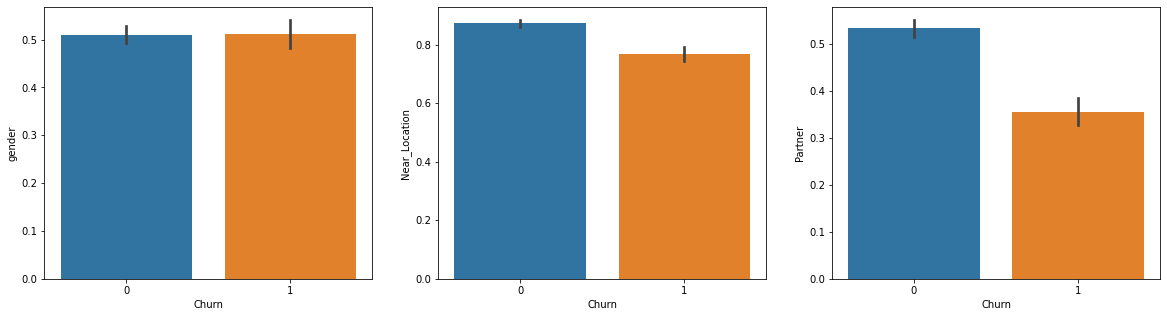

In [8]:
#columns = list(df.drop('Churn', axis=1).columns)
def get_hist(col_1, col_2, col_3):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    sns.barplot(x='Churn', y=col_1, data=df)   
    plt.subplot(1, 3, 2)
    sns.barplot(x='Churn', y=col_2, data=df)  
    plt.subplot(1, 3, 3)
    sns.barplot(x='Churn', y=col_3, data=df) 
    plt.show()
get_hist('gender', 'Near_Location', 'Partner')    

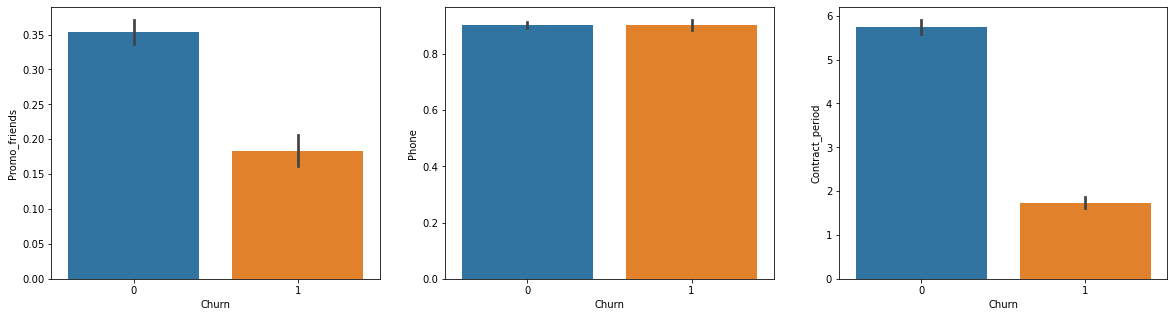

In [9]:
get_hist('Promo_friends', 'Phone', 'Contract_period' )  

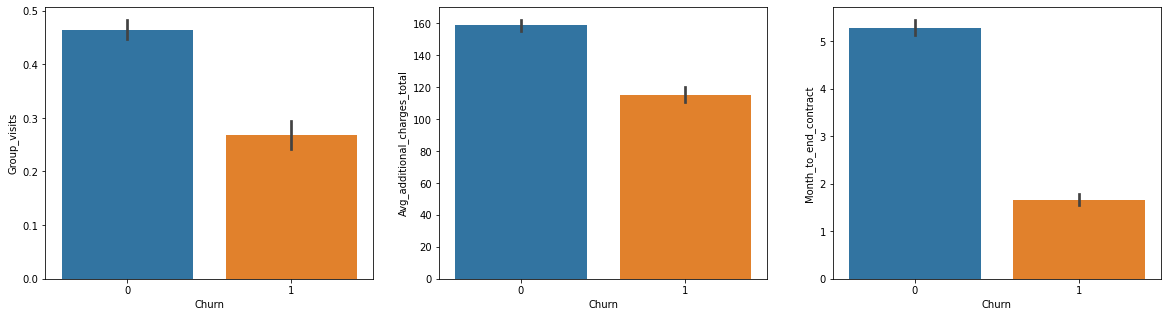

In [10]:
get_hist('Group_visits', 'Avg_additional_charges_total', 'Month_to_end_contract' )  

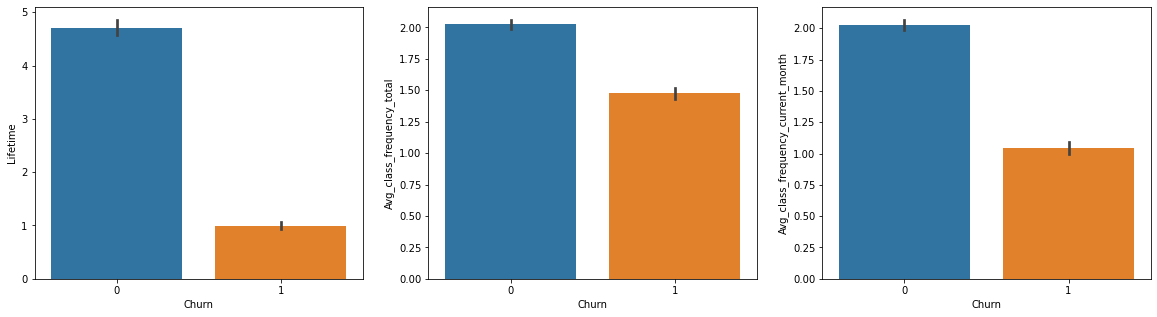

In [11]:
get_hist('Lifetime', 'Avg_class_frequency_total', 'Avg_class_frequency_current_month' )  

Теперь мы имеем наглядное распределение признаков между клиентами которые ушли в отток (они отмечены оранжевым цветом) и клиентами которые остались (отмечены синим).

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличный формат визуализации наших данных 👍
</div>

### Построим матрицу корреляций и отобразим её

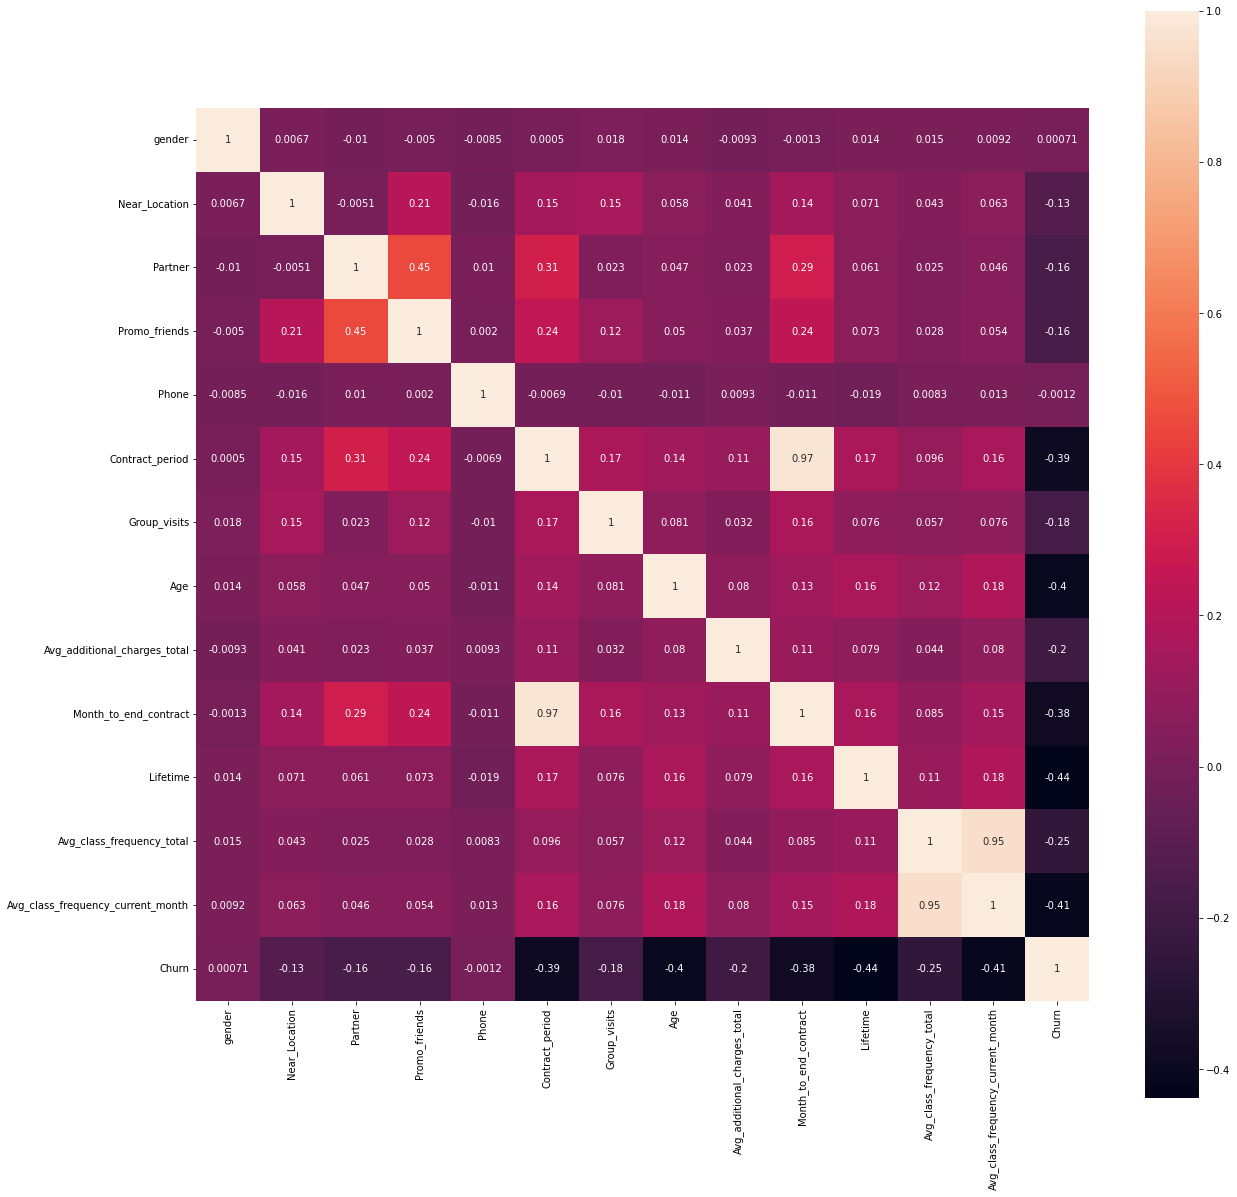

In [12]:
corr_m = df.corr() # получаем матрицу коррелящий для набора данных
plt.figure(figsize = (20,20)) #задаём размер фигуры
sns.heatmap(corr_m, square = True,  annot = True)
plt.show()

Имеем 2 пары признаков которые сильно коррелируют между собой: 
- Month_to_end_contract и Contract_period;
- Avg_class_frequency_total и Avg_class_frequency_current_month.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Действительно у нас есть сильная корреляция между несколькими переменными и это говорит о мультиколлениарности.
    
Здорово, что мы как раз избавляемс яот таких переменных.
    
</div>

## Построим модель прогнозирования оттока клиентов

### Создадим модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце

Чтобы избежать *мультиколлинеарности* необходимо удалить одни из каждой пары найденных линейно-зависимых признаков, так как при высоком коэффициенте корреляции с моделью могут возникнуть трудности, а именно: непрезентативные веса и переобученная под эти признаки модель.

In [13]:
# один из пары сильно коррелирующих признаков удалим вручную:
df = df.drop(['Month_to_end_contract', 'Avg_class_frequency_total'], axis=1)

In [14]:
# определим функцию, которая будет выводить необходимые нам метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

# разделим данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

# разделяем модель на обучающую и валидационную выборку
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# стандартизируем имеющиеся признаки для лучшей работы модели
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# обучим модель случайного леса
rf_model.fit(X_train, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test) # Ваш код здесь
rf_probabilities = rf_model.predict_proba(X_test)[:,1] # Ваш код здесь
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities,
    title='Метрики для модели случайного леса:'
)

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
Метрики для модели случайного леса:
	Accuracy: 0.90
	Precision: 0.81
	Recall: 0.75


<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Отличная функция для расчета метрик 👍    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

    
В целом выборка разделена верно. 
Я бы рекомендовал бы ещё использовать атрибут `stratify`, поместив в него целевую переменную. Он дает нам безопасность сохранения 20% значений равного нужного нам количества классов в целевой переменной.
    
Пример: `stratify=y`
    
---
    
Хорошо, что используем параметр `random_state`, чтобы получать одни и те же результаты.
    
</div>

- рассматриваемые модели прогнозируют одинаковую долю правильных ответов - Accuracy;
- за точность отвечает метрика Precision, она показывает долю правильных прогнозов относительно "1" класса. По этой метрике лучше себя проявила модель на основе алгоритма случайного леса - RandomForestClassifier;
- Recall оказалась выше у модели основанной на алгоритме логистической регрессии. Эта метрика отображает сколько реальных объектов "1" класса смогли обнаружить с помощью модели.

**Вывод:**

В этом проекте большее внимание стоит обратить на метрику Precision , так как при прогнозировании оттока клиентов из сети фитнес-ценров, каждое срабатывание модели - факт отнесения к "1" (клиент попал в отток) - стоит ресурсов, например, запуск дополнительных промоакций для удержания клиента или запуск рассылки с дополнительной мотивацией посещения спортзала. 

Recall нацелена на минимизацию противоположных рисков, поэтому она имеет меньший приоритет в рассматриваемом случае. 

Модель, основанная на алгоритме случайного леса, показала более высокую метрику точности Precision, чем модель, основанная на алгоритме логистической регрессии. Таким образом, приходим к выводу о том, что в данном примере лучше себя проявила модель, основанная на алгоритме случайного леса - *RandomForestClassifier*  

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
   
Обрати внимание, что все рассчитанные метрики по отдельности сложны в интерпритации, хотелось чтобы одна метрика включала в себя самые ключевые параметры. Есть метрика `F1`, которая как раз включает в себя основные параметры точности и полноты. 
    
В том числе рекомендую смотреть на метрику `ROC–AUC`. 
    
    
Ниже статья, в которой есть материалы про метрики и как их визуализировать.
    
https://habr.com/ru/company/ods/blog/328372/
    
---

Можно также попробовать и сравнить параметр `C` у логистической регрессии. У случайного леса количество деревьев (`n_estimators`) и максимальную глубину дерева (`max_depth`), чтобы осуществить поиск лучшей модели.
    
---
    
Кстати для автоматического перебора гиперпараметров мы можем использовать готовый метод `GreadSearchCV` в библиотеке `sklearn`. 
    
</div>

## Кластеризация клиентов

In [15]:
# отложим столбец с оттоком для проведения кластеризации
clust_df = df.drop('Churn', axis = 1)

# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(clust_df)

# предаём стандартизированную таблицу в качестве параметра функции linkage
# для показательности диаграммы, передаём праметру method значение 'ward'
linked = linkage(x_sc, method = 'ward')


Теперь в переменной сохранена таблица "связок" между объектами. Её можно визуализировать как дендрограмму

### Построение дендрограммы

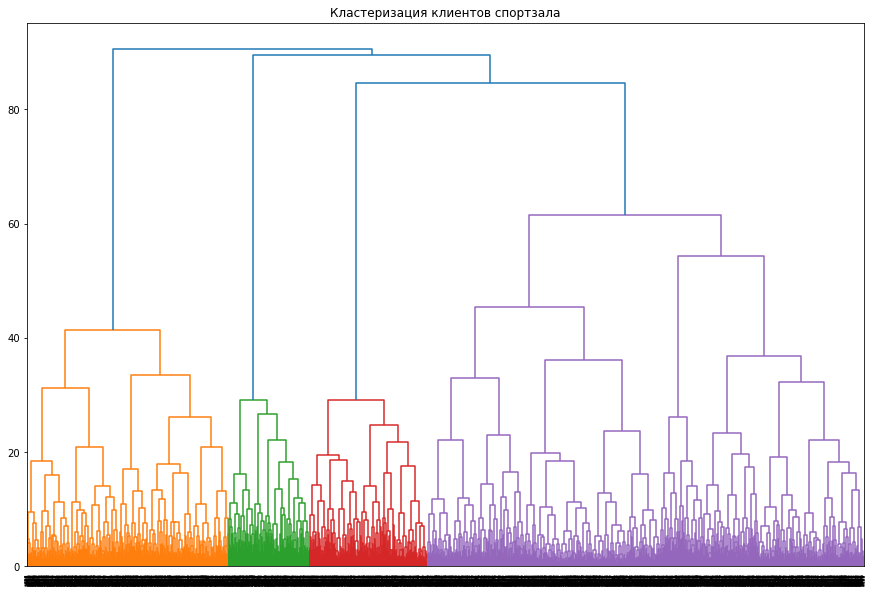

In [16]:
plt.figure(figsize=(15,10))
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов спортзала')
plt.show()

Предложенное оптимальное число кластеров 4 - четыре различных цвета на графике

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Отлично 👍

В том числе чтобы определить количество кластеров можно использовать метод локтя. 
    
Ниже статья с двумя методами, которые можно в том числе использовать для определения количества кластеров.
    
https://habr.com/ru/company/jetinfosystems/blog/467745/
    
</div>

### Обучение модели кластеризации на основании алгоритма K-Means и прогнозированние кластеров клиентов

In [17]:
# задаём модель k_means с числом кластеров 5 (из условия) и фиксируем значение random_state
km = KMeans(n_clusters=5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)
 
# сохраняем метки кластера в поле датасета
df['cluster_km'] = labels
 
# выводим статистику по средним значениям признаков по кластеру
clusters = df.groupby('cluster_km').mean()
display(clusters)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,
0,0.496447,0.995939,0.892386,1.000000,1.0,6.922843,0.524873,29.606091,153.424651,4.283249,1.919520,0.119797
1,0.500000,0.000000,0.489247,0.078853,1.0,2.994624,0.232975,28.679211,137.125763,2.974910,1.597146,0.403226
2,0.500940,1.000000,0.217105,0.072368,1.0,2.010338,0.277256,27.583647,119.339956,1.922932,1.203319,0.563910
3,0.534260,0.996028,0.379345,0.009930,1.0,6.208540,0.538232,30.699106,176.259567,5.415094,2.324220,0.014896
4,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,3.940415,1.723967,0.266839


**Вывод:**

Посмотрев на средние значения признаков разделённых на кластеры, сразу можно выделить некоторые особенности:
- в кластер № 1 модель определила всех клиентов кто проживает не в том же районе где расположен фитнес-клуб;
- в кластер № 0 попали только те клиенты, кто купил абонемент по рекомендации друга;
- клиентов, которые не оставили номера телефона, модель определила в 4 й кластер;
- наибольшее количество клиентов попавших в отток, модель определила в кластеры № 1 и № 2

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>

Супер, теперь у нас есть портреты наших пользователей 👍
    
</div>

### Визуализация распределения признаков для кластеров

<Figure size 1296x360 with 0 Axes>

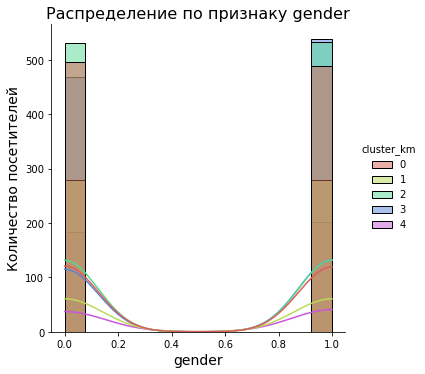

<Figure size 1296x360 with 0 Axes>

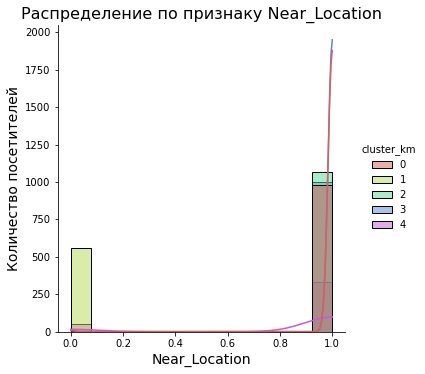

<Figure size 1296x360 with 0 Axes>

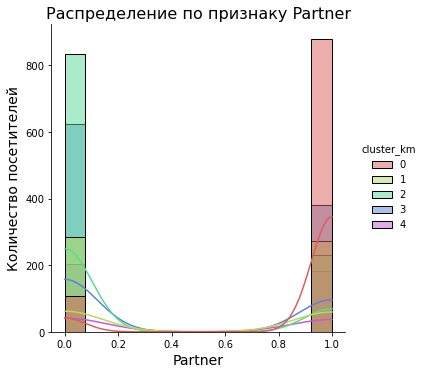

<Figure size 1296x360 with 0 Axes>

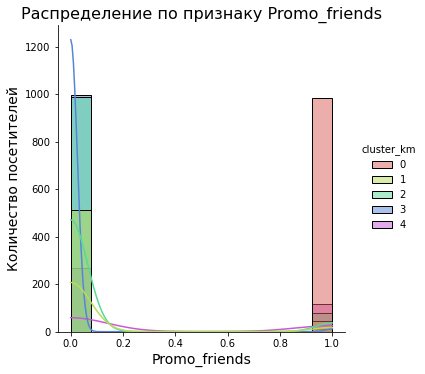

<Figure size 1296x360 with 0 Axes>

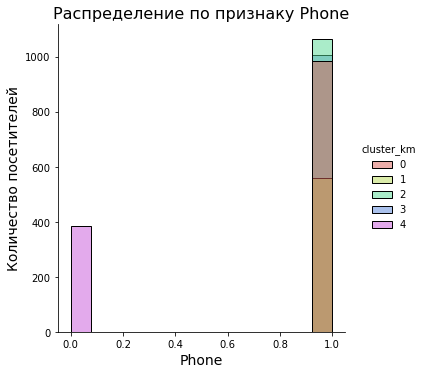

<Figure size 1296x360 with 0 Axes>

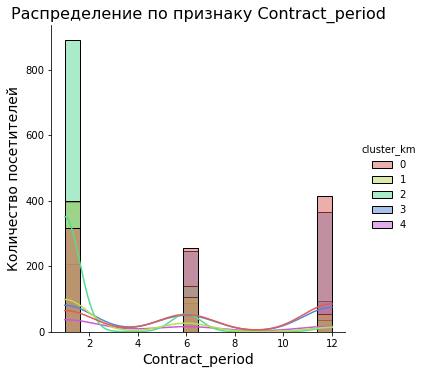

<Figure size 1296x360 with 0 Axes>

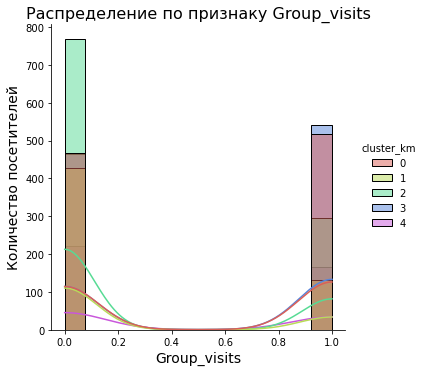

<Figure size 1296x360 with 0 Axes>

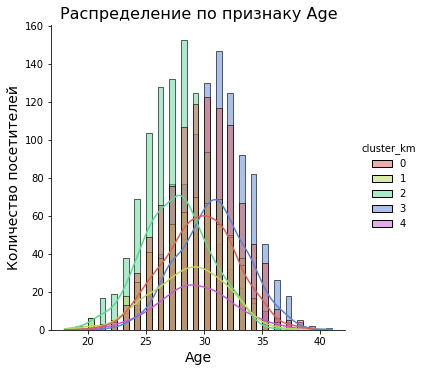

<Figure size 1296x360 with 0 Axes>

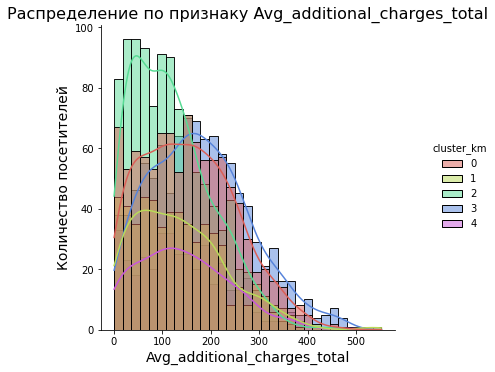

<Figure size 1296x360 with 0 Axes>

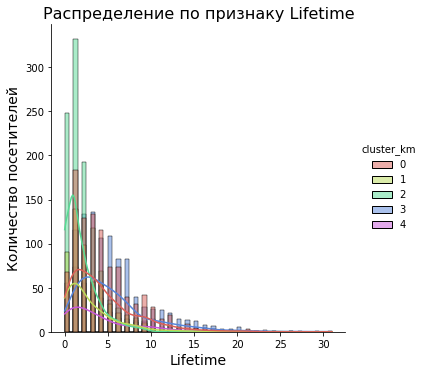

<Figure size 1296x360 with 0 Axes>

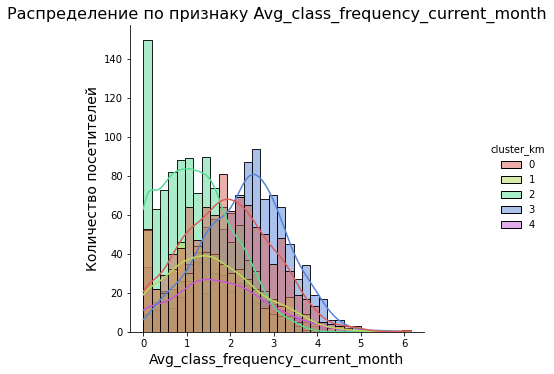

<Figure size 1296x360 with 0 Axes>

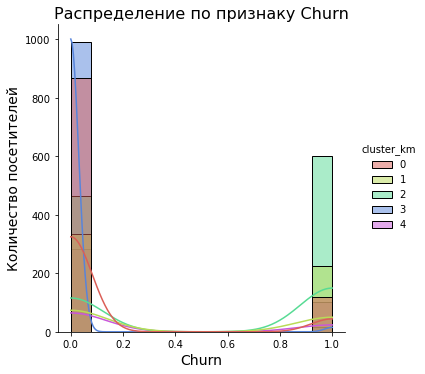

In [18]:
current_palette = sns.color_palette ("hls", 5) # самостоятельно определить 5 цветов
for name in list(df.drop('cluster_km',axis=1).columns):
    plt.figure(figsize=(18,5))
    sns.displot(data = df, x = name, kde=True, hue = 'cluster_km', palette = current_palette)
    plt.title('Распределение по признаку '  +name, fontsize = 16, color = 'black')
    plt.ylabel('Количество посетителей', fontsize = 14, color = 'black')
    plt.xlabel(name, fontsize = 14, color = 'black')

**Вывод:**

По полученным диаграммам видим, что существенная разница в кластерах наблюдается при распределении по следующим признакам:
- Near_Location. Модель определила в кластер № 1 тех клиентов, кто живёт/работает не в одном районе с фитнес-центром;
- Partner. Тут модель также явно распределила по разным кластерам клиентов которые пришли в зал от компаний - партнёров и тех, кто пришёл в зал без посредников;
- Promo_friends. Практически всех клиентов кто пришёл по приглашению друзей модель определила в кластер № 0;
- Phone. Модель решила, что все пользователи без телефонов окажутся в кластере № 4;
- Contract_period. Тут выделены отдельные кластеры для клиентов у которых приобретён абонемент менее чем на 2 месяца.

По остальным признакам явной разницы между распределениями в разных класерах не видно, вероятнее всего, разница действительно отсутствует.


### Для каждого полученного кластера посчитаем долю оттока

Для формирования итоговых выводов составим наглядную таблицу с долей оттока по признакам, которые вносят существенное различие между кластерами:

In [19]:
(
    df.groupby('cluster_km').agg({'Churn':'mean'
                              , 'Near_Location':'sum'
                              , 'Partner':'sum'
                              , 'Promo_friends':'sum'
                              , 'Phone':'sum'
                              , 'Group_visits':'sum'    
                              , 'Contract_period':'mean'
                             })
                            .sort_values(by='Churn', ascending=False)
)

,Churn,Near_Location,Partner,Promo_friends,Phone,Group_visits,Contract_period
cluster_km,,,,,,,
2,0.563910,1064,231,77,1064,295,2.010338
1,0.403226,0,273,44,558,130,2.994624
4,0.266839,333,182,118,0,165,4.777202
0,0.119797,981,879,985,985,517,6.922843
3,0.014896,1003,382,10,1007,542,6.208540


**Вывод:**

Самой высокой долей оттока клиентов обладает кластер № 2, сразу за ним по этому показателю следует кластер № 1.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    
Думаю, теперь у коллег из маркетинга будет много дополнительной информации, которую они смогут использовать при разработке дополнительных мероприятий по сокращению оттока.
</div>

## Общие выводы и базовые рекомендации по работе с клиентами

**Общие выводы:**
- теперь, благодаря созданной модели бинарной классификации, мы можем прогнозировать отток клиентов на основании имеющихся признаков;
- в прогнозировании оттока клиентов из фитнес центров "Культурист-датасентист" лучше себя показала модель основанная на алгоритме случайного леса - RandomForestClassifier;
- благодаря кластеризации выявили два класса клиентов, которые больше всего попадают в отток: кластер № 2 и кластер № 1.

**Рекомендации:**
- стоит обратить внимание на то, что редко уходят клиенты которые занимаются по групповым программам, возможно в сети фитнес-центров стоит расширить спектр групповых занятий для удержания клиентов;
- запустить дополнительное промо на тему "приведи друга", так как клиент реже уходит в отток, если он попал в клуб по промокоду от знакомого. Вероятно, это связано опять же с тем, что в компании заниматься спортом более увлекательно чем одному;
- подумать над способами заинтересовать клиентов покупать абонементы на длительный срок, так как у клиентов которые имеют абонемент продолжительностью до 2х месяцев отток наблюдается значительно чаще.

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    


Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
       
В целом сам проект выполнен на хорошем уровне! На протяжении всей работы чувствуется глубина проработки задачи и это безусловный плюс для нас. Было использовано большое количество методов, которые будут помогать тебе в дальнейших проектах.
        
    
    
Если вдруг будет дополнительный интерес по осовоению дополнительных материалов этой темы, вот достаточно неплохая информация по базовым алгоритмам:
    
https://compscicenter.ru/courses/data-mining-python/2018-spring/classes/
    
P.s. Там несколько курсов, по которым можно будет пройтись при желании 😊

    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера: ✅</b>
    

Возвращаю проект обратно, чтобы убедиться что все мои комментарии понятны.
    
Если вдруг у тебя возникнут какие-то вопросы, то я с радостью отвечу на них 😊
    
</div>

<div class="alert alert-info"> <b>Комментарий студента: </b> Комментарии поняты, хорошего настроения.😊 </div>